# Hola Javier!

Mi nombre es David Bautista, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres.**

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

# Comentario General

Hola Javier, te felicito por el desarrollo del proyecto hasta el momento. Ahora bien, he dejado diferentes comentarios para que los puedas revisar y tener en cuenta para la siguiente entrega. </div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Javier, no olvides que es fundamental poder estructurar una sección de introducción para e desarrollo del proyecto.  </div>

<div class="alert alert-block alert-info">
Añadí una introducción al problema y las actividades realizadas en el análisis
</div>

# INTRODUCCIÓN

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.
Model Fitness ha digitalizado varios de sus perfiles de clientes. El objetivo de este análisis es obtener información para elaborar una estrategia de retención de clientes. Para ello se realizarán las siguientes tareas:
- Se analiza la distribución de características para los miembros activos y no activos.
- Se analiza la correlación entre diferentes características.
- Se crea un modelo para predecir la cancelación de usuarios.
- Se calcula la tasa de cancelación después de segmentar a los usuarios por clústeres.
- Se muestran conclusiones del análisis y sugerencias para las campañas futuras.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
import sklearn as sk

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Perfecto, buen trabajo importando las librerías necesarias para el desarrollo del proyecto. </div>

In [2]:
#Leer datos
raw_gym_churn = pd.read_csv('gym_churn_us.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Perfecto. Buen trabajo cargando el dataset principal para el desarrollo del proyecto.   </div>

# 1 PRIMER VISTAZO A LOS DATOS

In [3]:
#Crear función para primer vistazo de los datos
def first_lookup (dataframe):
    print('-----Dataframe information-----')
    display(dataframe.info())
    print('\n-----Statistics-----\n')
    display(dataframe.describe())
    print('\n-----Duplicates-----\n')
    print(dataframe.duplicated().sum())
    print('\n-----Empty values-----\n')
    print(dataframe.isna().sum())
    print('\n-----Head rows-----\n')
    display(dataframe.head(10))    

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Excelente, buen trabajo estrucutndao una función para desarollar ese "first_lookup" al dataframe.   </div>

In [4]:
#Llamada a la función para primer vistazo de la tabla de hipótesis
first_lookup(raw_gym_churn)

-----Dataframe information-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_tota

None


-----Statistics-----



,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000



-----Duplicates-----

0

-----Empty values-----

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

-----Head rows-----



,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Buen trabajo!!   </div>

# 2 PREPARAR LOS DATOS PARA EL ANÁLISIS

In [5]:
#Crear copias de las tablas originales
clean_gym_churn = raw_gym_churn.copy()

In [6]:
#Limpiar nombres de las columnas de todas las tablas
clean_gym_churn.columns = [columna.lower().replace(' ','_') for columna in clean_gym_churn.columns]

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Perfecto, buen trabajo modificando los encabezados del dataframe.    </div>

# 3 LLEVAR A CABO EL ANÁLISIS EXPLORATORIO DE DATOS (EDA)

## 3.1 Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).

In [7]:
display(clean_gym_churn.describe())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Observaciones:
- No hay valores ausentes (se comprueba en la sección 1)
- No hay registros duplicados (se comprueba en la sección 1)
- Una media de 84% de personas viven cerca del gimnasio
- Se tiene el registro de teléfono del 90% de los usuarios
- La edad promedio de los miembros es de 29 años
- Hay un ingreso por servicios adicionales de $146.94 en promedio
- El promedio de vida como cliente del gimnasio es de 3.72 meses
- Se registran menos de dos visitas por semana en promedio

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Perfecto, buen trabajo con el uso y estudio del método ``descrbie()``.     </div>

## 3.2 Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

In [8]:
# Calcular los valores medios para cada grupo
churn_mean_values = clean_gym_churn.groupby('churn').mean()
display(churn_mean_values)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Excelente, buen trabajo estructurando esta tabla agrupada para estudiar los valores medios de las características sujetos al estado de cancelación de la membresía. Ten en cuenta que sería ideal poder complementar la tabla con observaciones sobre lo encontrado.     </div>

<div class="alert alert-block alert-info">
Añadí mis observaciones para la tabla anterior
</div>

## 3.3 Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

In [9]:
#Cantidad de clientes en cada grupo de churn
churn_count = clean_gym_churn['churn'].value_counts()
print(churn_count)

churn
0    2939
1    1061
Name: count, dtype: int64


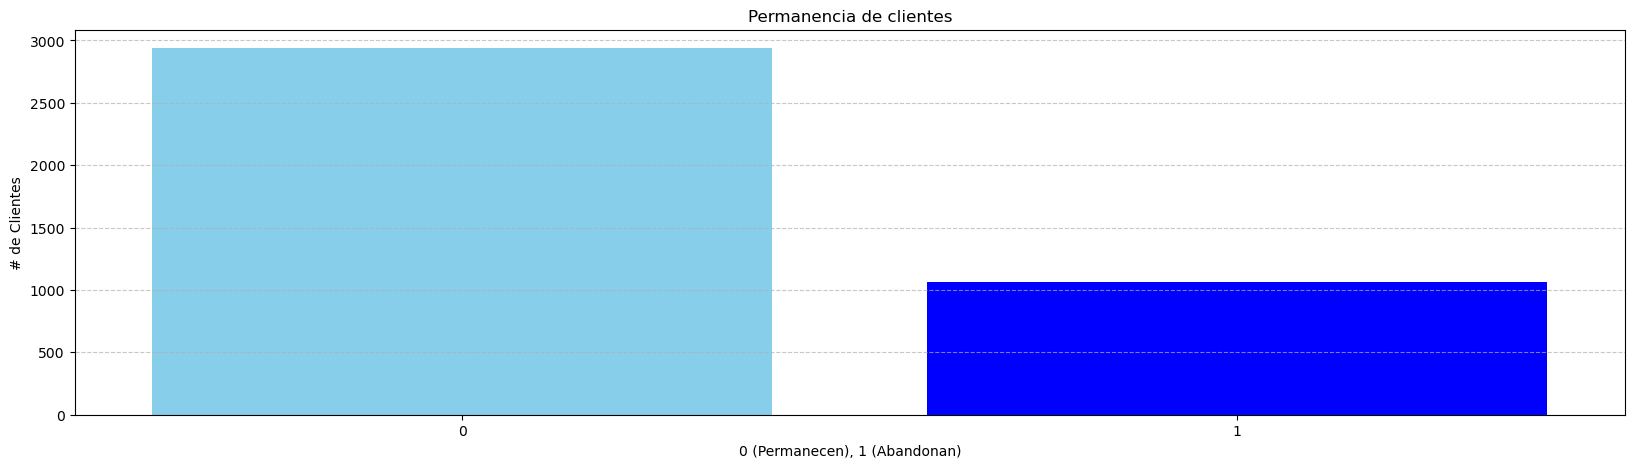

In [10]:
# Gráfico de barras
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=churn_count.index, y=churn_count.values)

# Asignar colores manualmente a cada barra
colors = ['skyblue', 'blue']
for bar, color in zip(ax.patches, colors):
    bar.set_facecolor(color)

# Personalizar el gráfico
plt.title("Permanencia de clientes")
plt.xlabel("0 (Permanecen), 1 (Abandonan)")
plt.ylabel("# de Clientes")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Perfecto, buen trabajo estudiando la distribución de la variable "objetivo".     </div>


## 3.4 Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

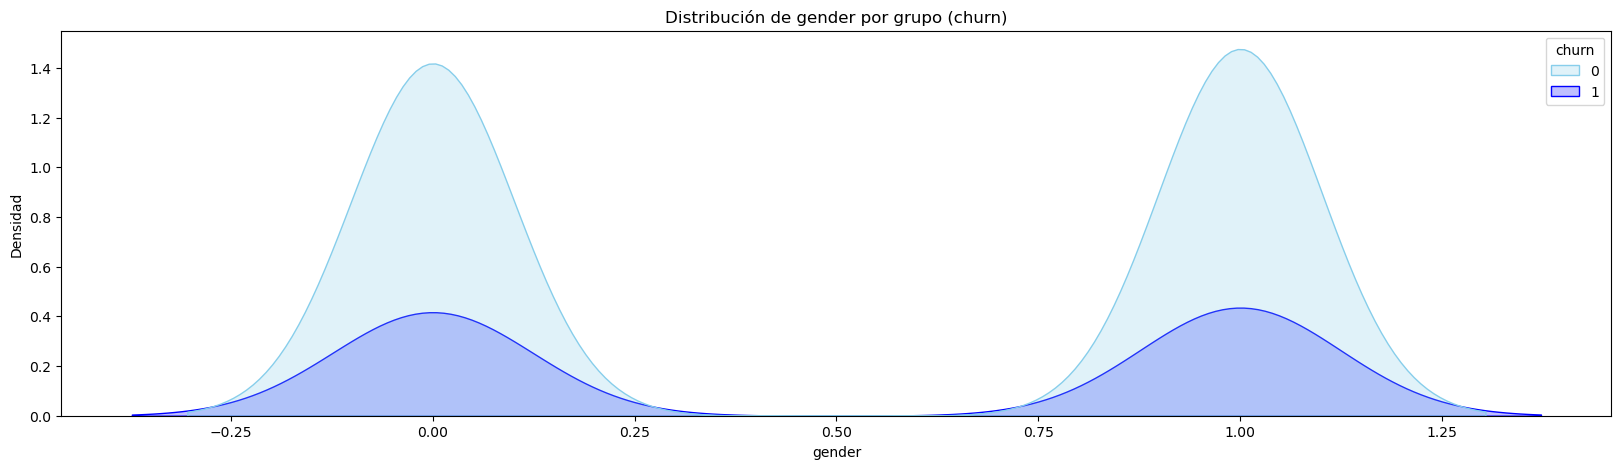

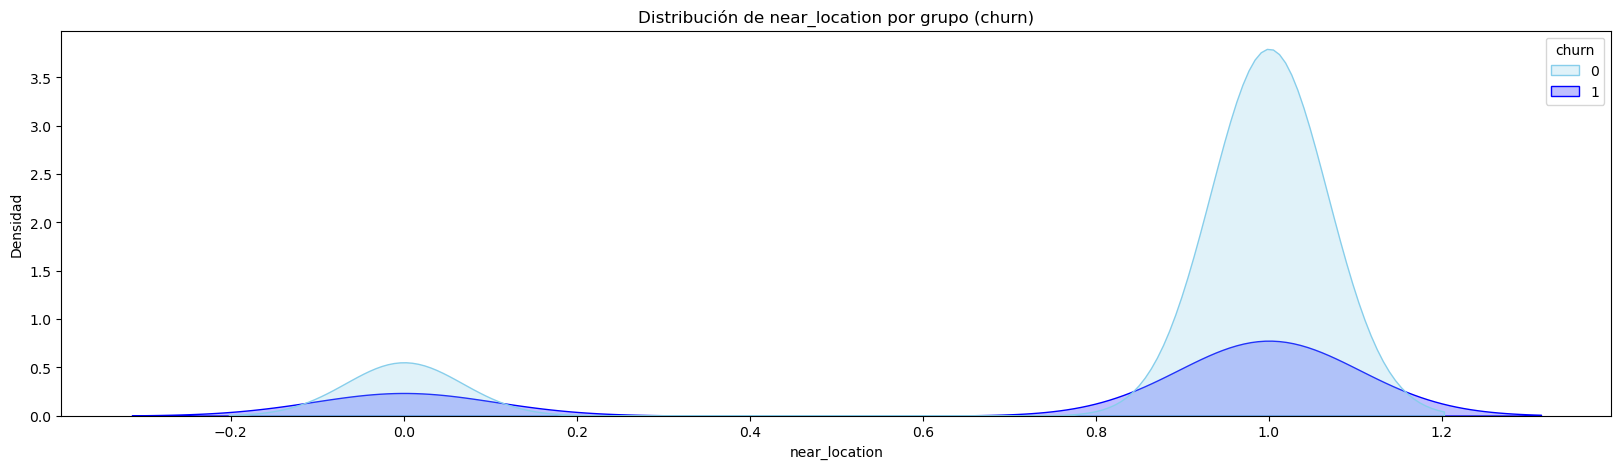

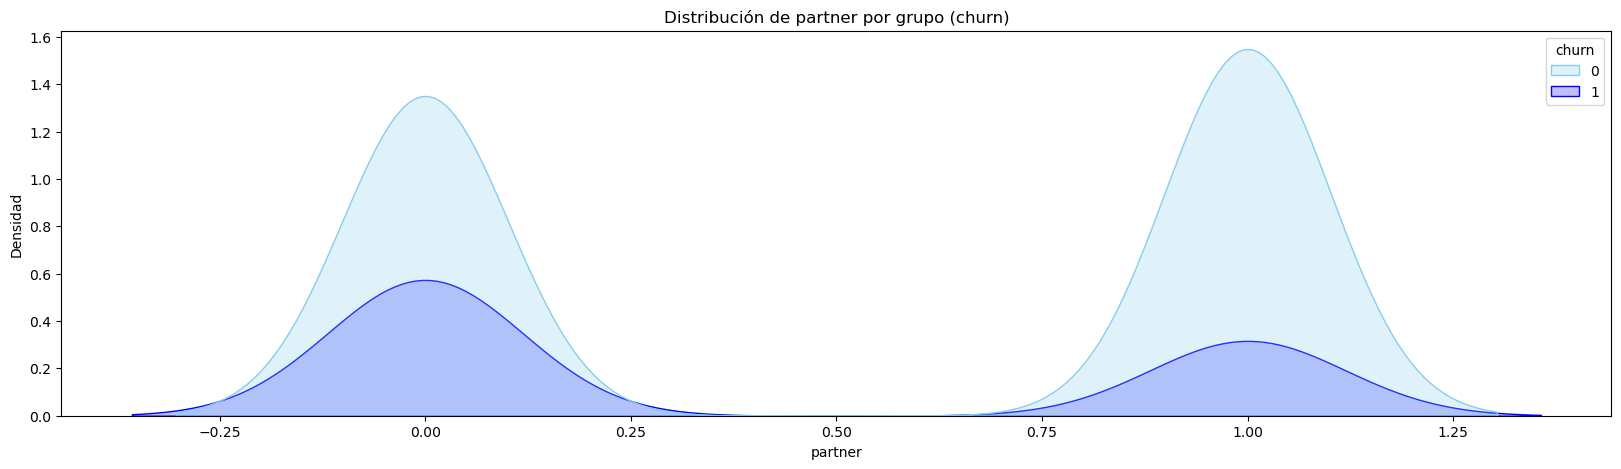

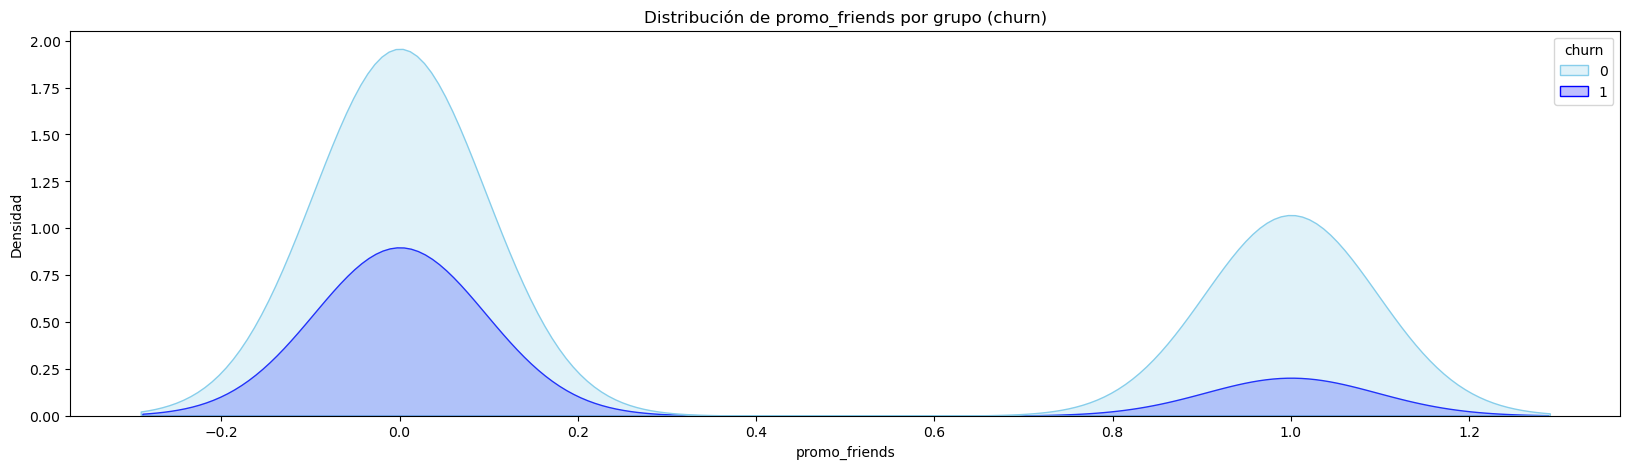

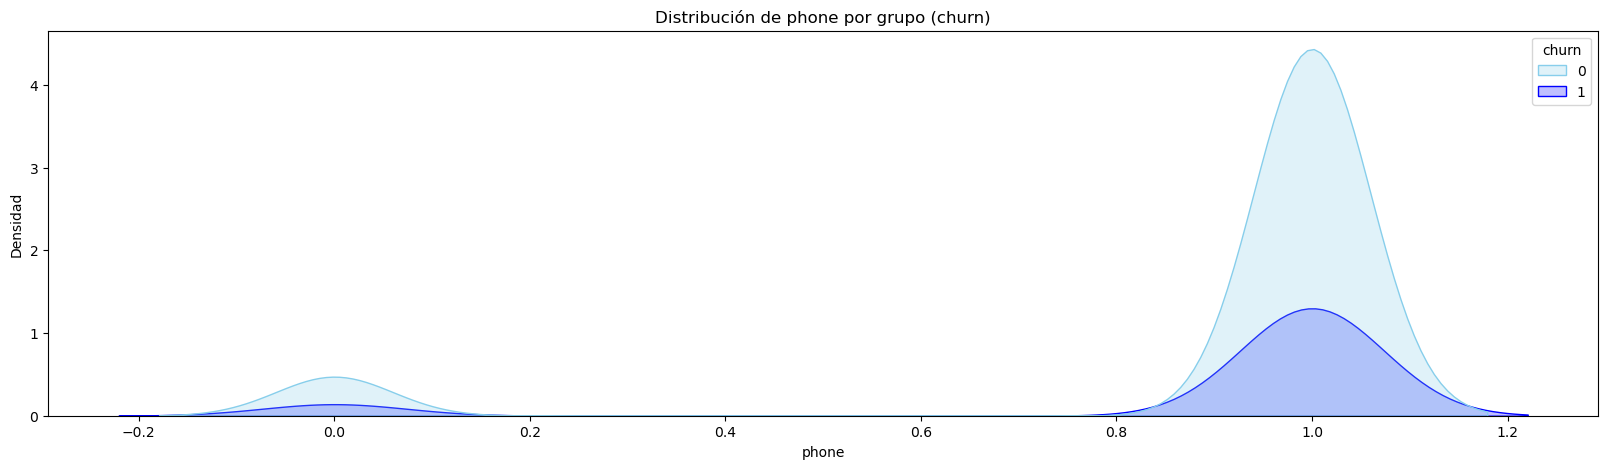

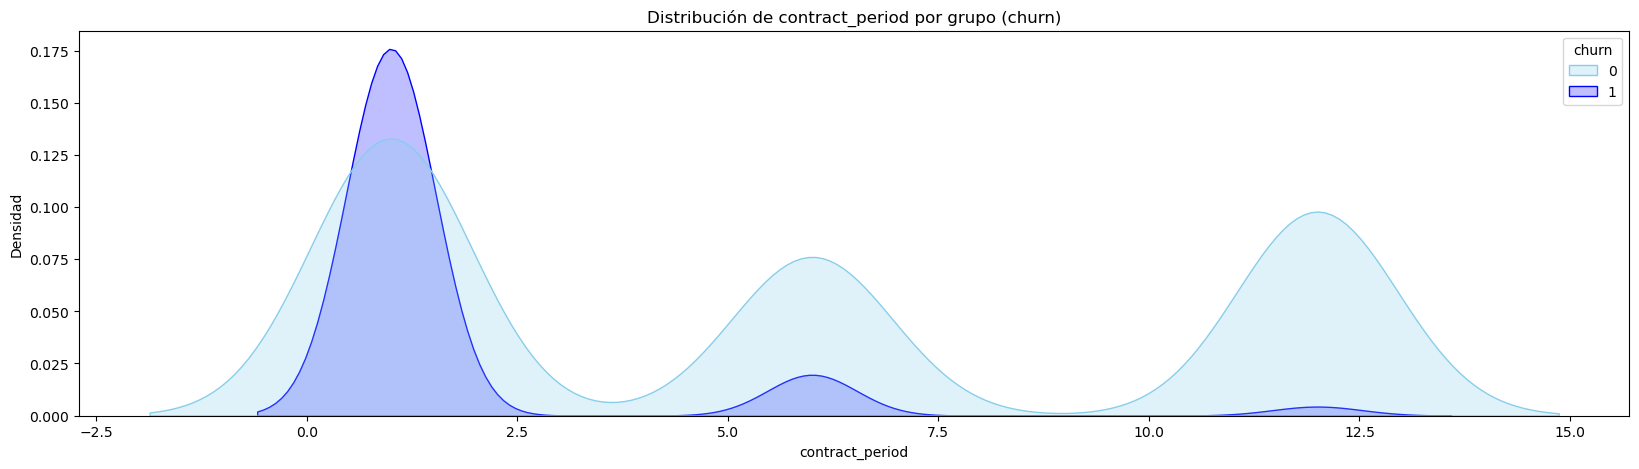

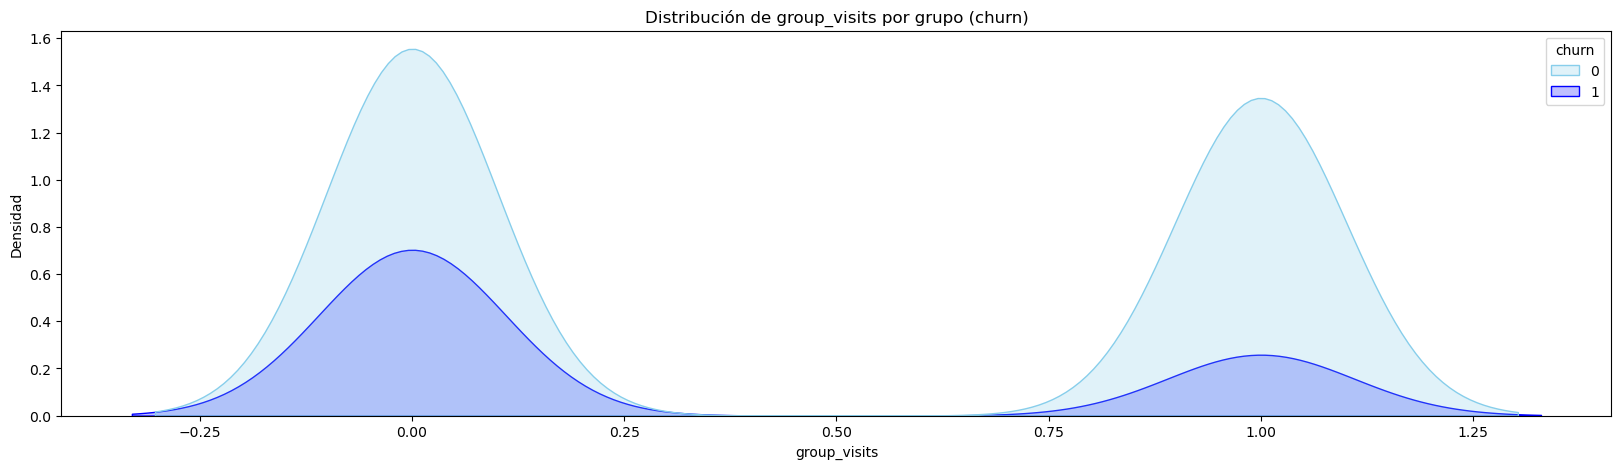

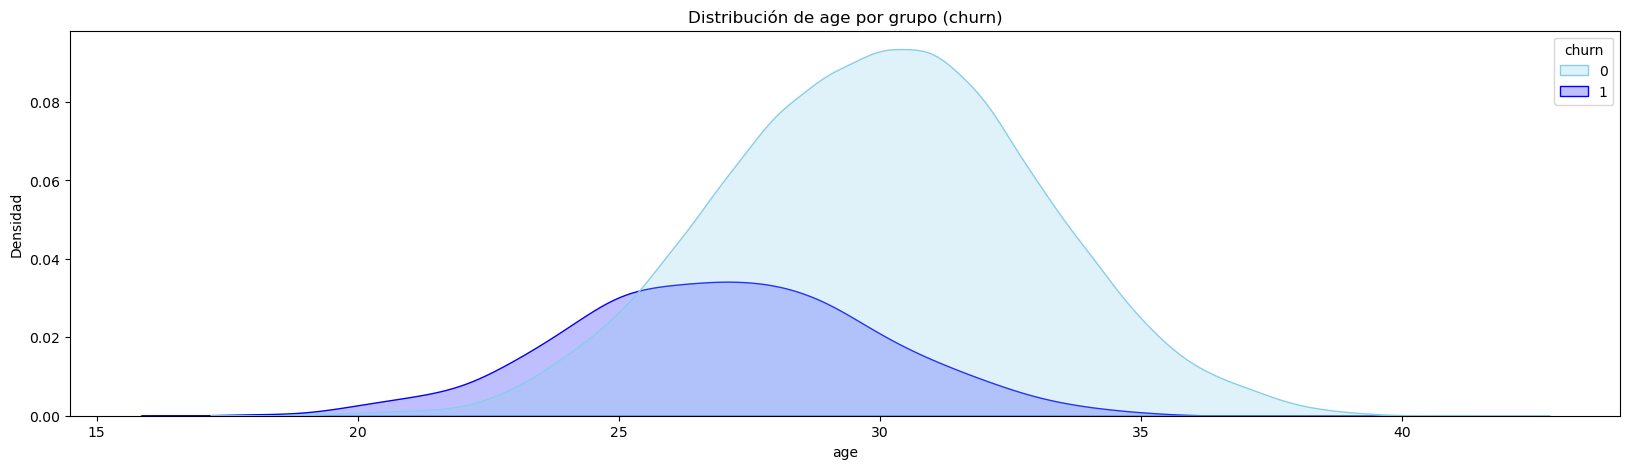

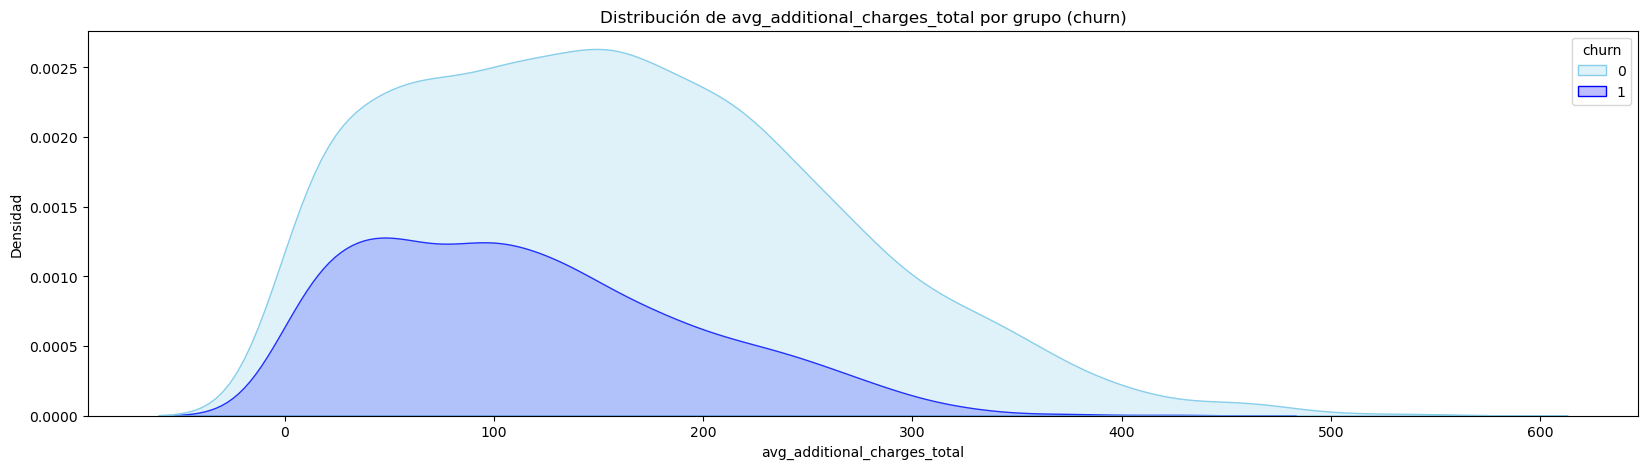

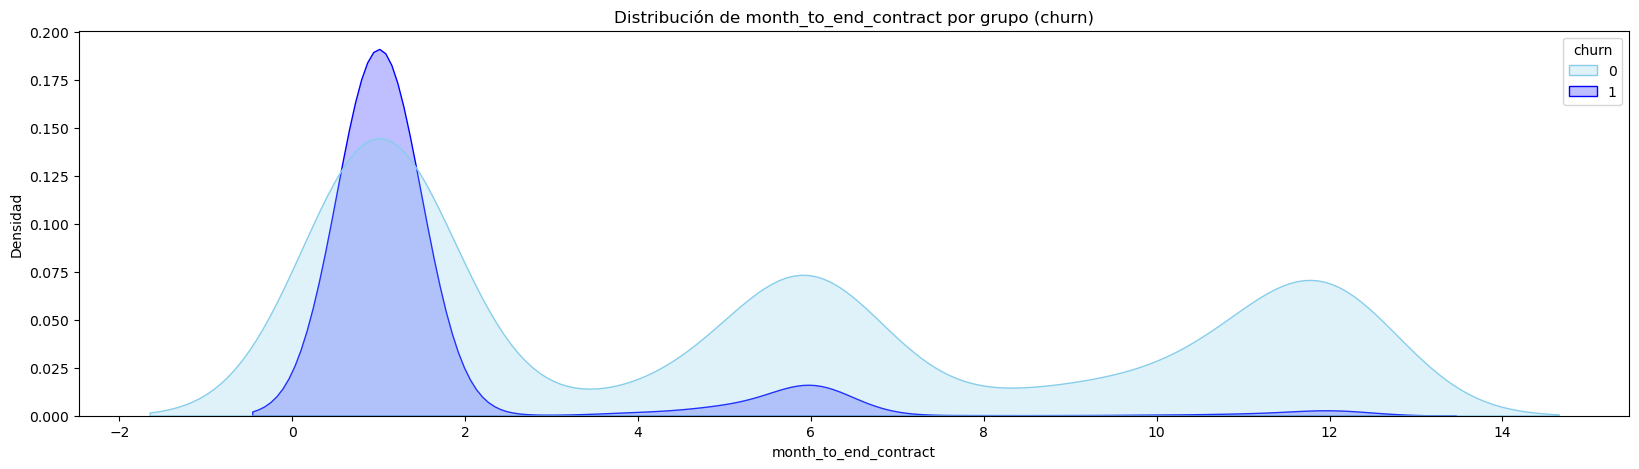

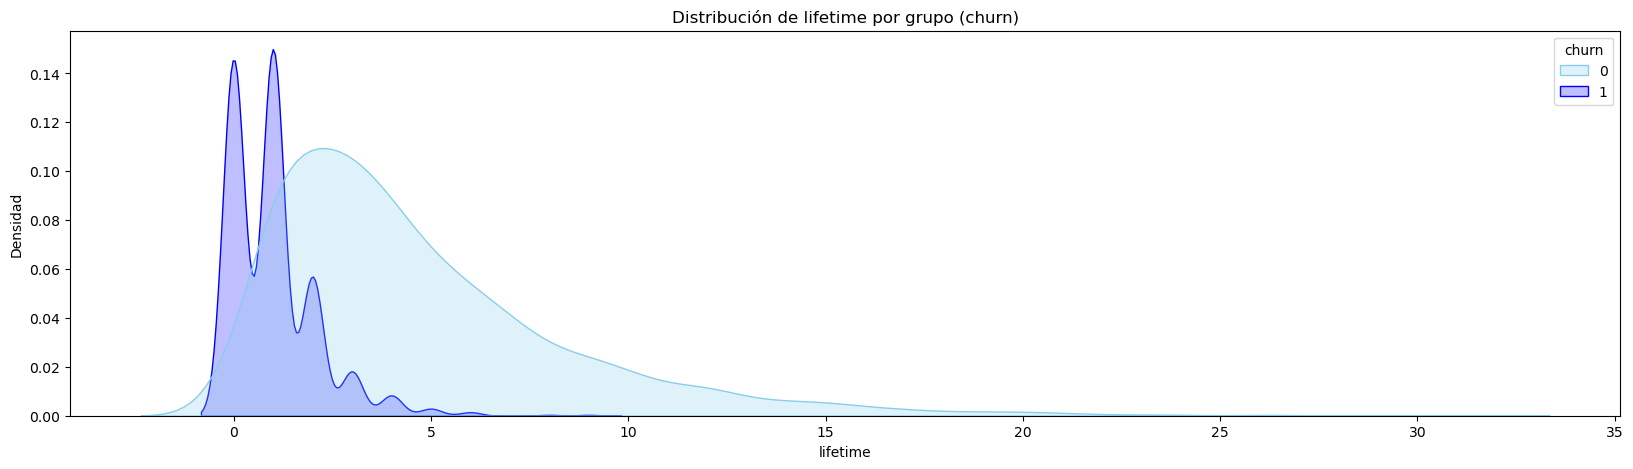

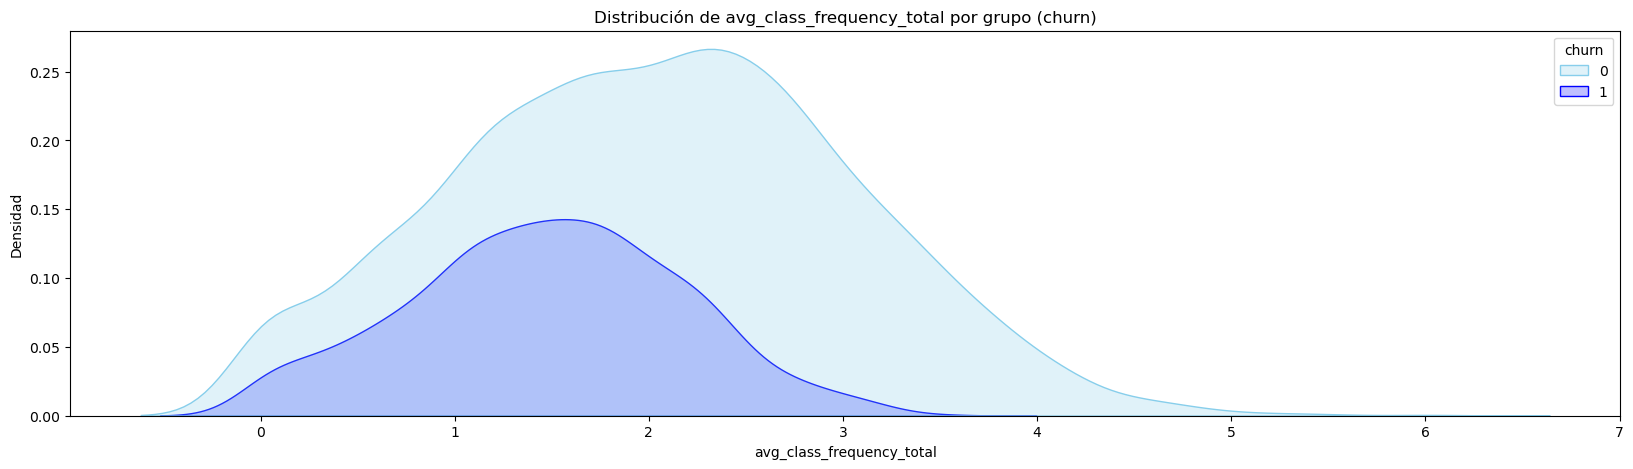

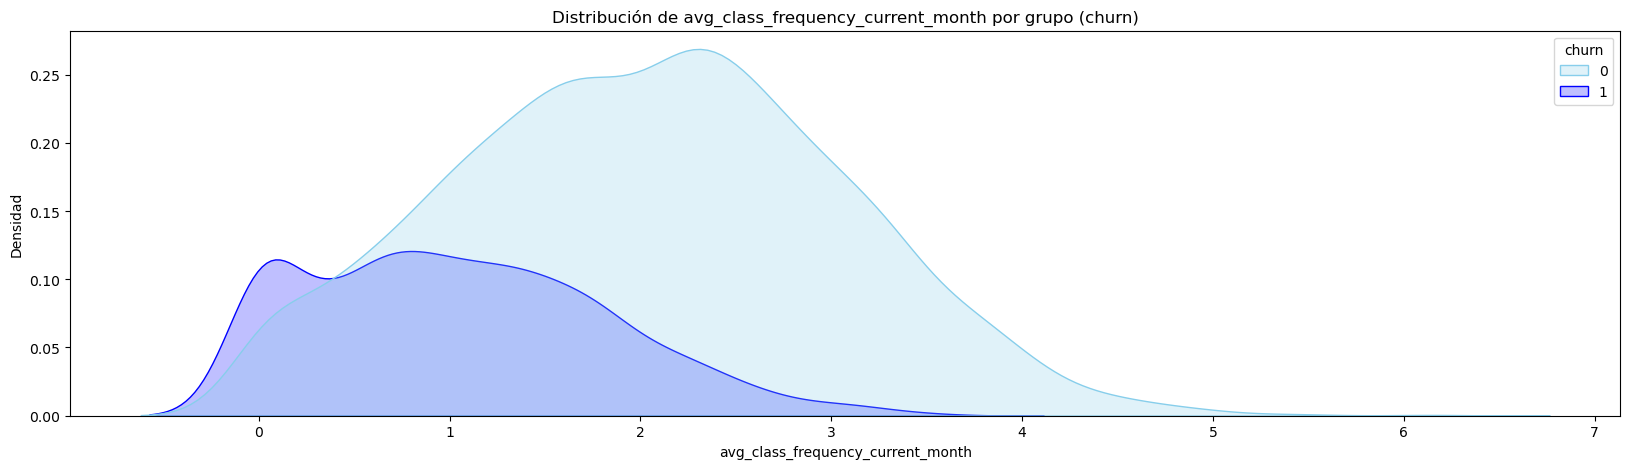

In [11]:
# Gráfico de densidades por grupo para cada característica de los datos
#fig, axes = plt.subplots(7,2, figsize=(25,10))
for characteristic in clean_gym_churn.drop('churn', axis=1).columns:
    plt.figure(figsize=(20, 5))
    sns.kdeplot(data=clean_gym_churn, x=characteristic, hue='churn', fill=True, palette=['skyblue', 'blue'])
    plt.title(f'Distribución de {characteristic} por grupo (churn)')
    plt.xlabel(characteristic)
    plt.ylabel('Densidad')
    plt.show()

In [12]:
print(clean_gym_churn)

      gender  near_location  partner  promo_friends  phone  contract_period  \
0          1              1        1              1      0                6   
1          0              1        0              0      1               12   
2          0              1        1              0      1                1   
3          0              1        1              1      1               12   
4          1              1        1              1      1                1   
...      ...            ...      ...            ...    ...              ...   
3995       1              1        1              0      1               12   
3996       0              1        0              0      1                1   
3997       1              1        1              1      1               12   
3998       0              1        1              1      1                6   
3999       1              0        1              0      0               12   

      group_visits  age  avg_additional_charges_tot

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Excelente, buen trabajo desplegando y estudiando los histogramas  con las distribuciones de las características sujetas al estado de cancelación de las membresías de los clientes.     </div>

## 3.5 Crea una matriz de correlación y muéstrala.

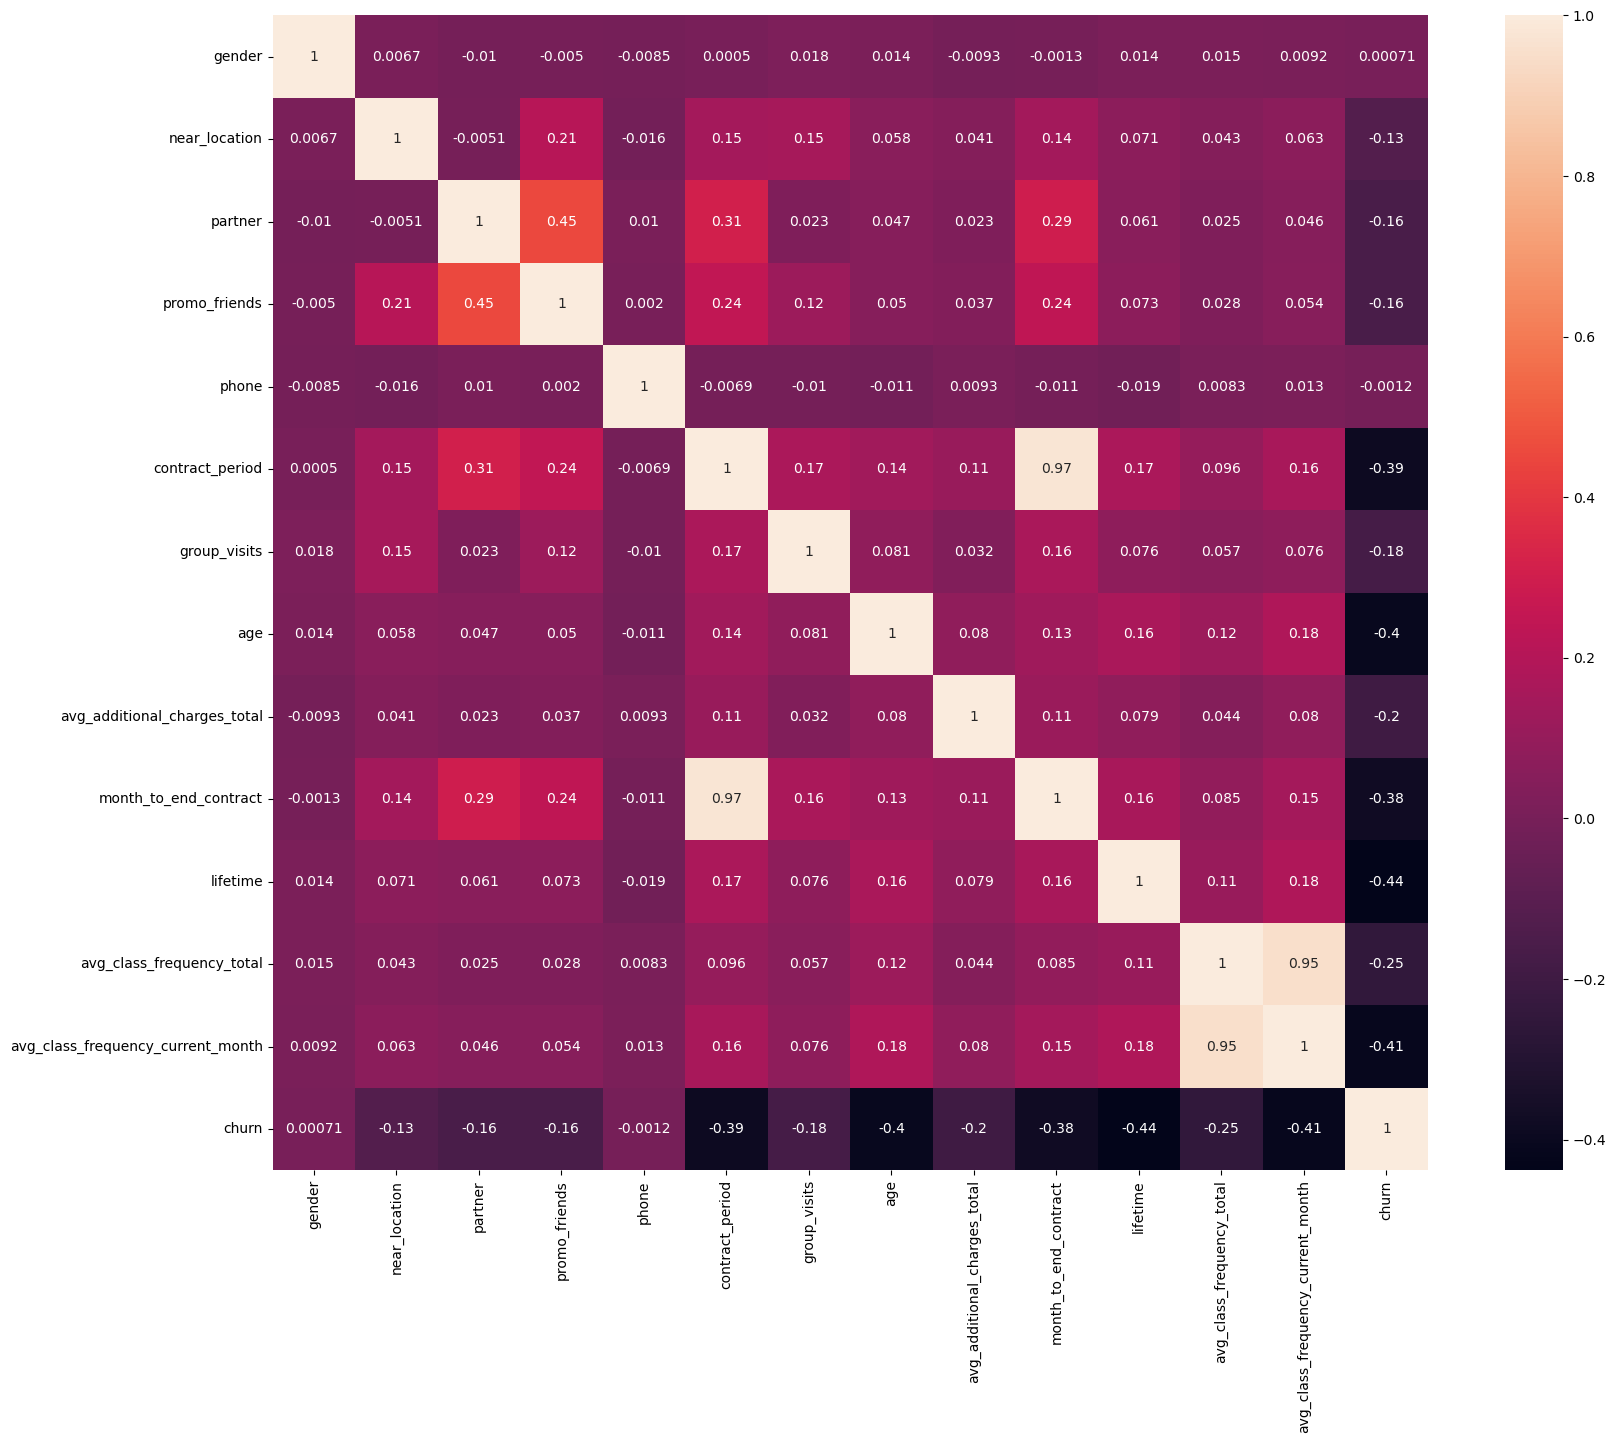

In [13]:
# Matriz de correlación
corr_M = clean_gym_churn.corr()

# Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_M, square=True, annot=True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Perfecto, buen trabajo estructurando y desplegando con el heatmap la matriz de correlaciones lineales entre las caracteristicas .      </div>

# 4 CONSTRUIR UN MODELO PARA PREDECIR LA CANCELACIÓN DE USUARIOS

## 4.1 Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().

In [14]:
# Separar los datos para entrenamiento y validación
train, test = sk.model_selection.train_test_split(clean_gym_churn, test_size=0.20, random_state=40)

In [15]:
# Dividir matriz de características y vector objetivo
X_train = train.drop(['churn'], axis=1)
y_train = train['churn']

X_test = test.drop(['churn'], axis=1)
y_test = test['churn']

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Perfecto, buen trabajo realizando el split de los datos. 
</div>

## 4.2 Entrena el modelo en el set de entrenamiento con dos métodos: Regresión logística y Bosque aleatorio.

In [16]:
# Regresión Logística
rl_model = sk.linear_model.LogisticRegression(max_iter=1000)
rl_model.fit(X_train, y_train)

rl_predict = rl_model.predict(X_test)

print('Resultados de Regresión Logística:')
print('Exactitud:', sk.metrics.accuracy_score(y_test, rl_predict))
print('Precisión:', sk.metrics.precision_score(y_test, rl_predict))
print('Recuperación:', sk.metrics.recall_score(y_test, rl_predict))

Resultados de Regresión Logística:
Exactitud: 0.9425
Precisión: 0.9009433962264151
Recuperación: 0.8842592592592593


In [17]:
# Modelo de Bosque Aleatorio
rf_model = sk.ensemble.RandomForestClassifier(n_estimators=100, random_state=40)
rf_model.fit(X_train, y_train)

rf_predict = rf_model.predict(X_test)

print('\nResultados de Bosque Aleatorio:')
print('Exactitud:', sk.metrics.accuracy_score(y_test, rf_predict))
print('Precisión:', sk.metrics.precision_score(y_test, rf_predict))
print('Recuperación:', sk.metrics.recall_score(y_test, rf_predict))


Resultados de Bosque Aleatorio:
Exactitud: 0.93625
Precisión: 0.8873239436619719
Recuperación: 0.875


Observaciones:
- Ambos modelos arrojan métricas muy buenas. El modelo de regresión logística es superior. Dado que su interpretación es más sencilla y cuesta menos computacionalmente, elegiría este modelo para el análisis.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Excelente, buen trabajo desplegando y evaluando la regresión logistica y el random forest. 
</div>

# 5 CREA CLÚSTERES DE USUARIOS/AS

## Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as)
## 5.1 Estandariza los datos.

In [18]:
# Seleccionar características relevantes con base en la matriz de correlación (excluyendo 'churn')
X = clean_gym_churn[['contract_period', 'month_to_end_contract', 'lifetime','avg_class_frequency_total', 'avg_class_frequency_current_month','avg_additional_charges_total']]

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Perfecto, buen trabajo aplicando el estandarizador a los datos. </div>

## 5.2 Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.

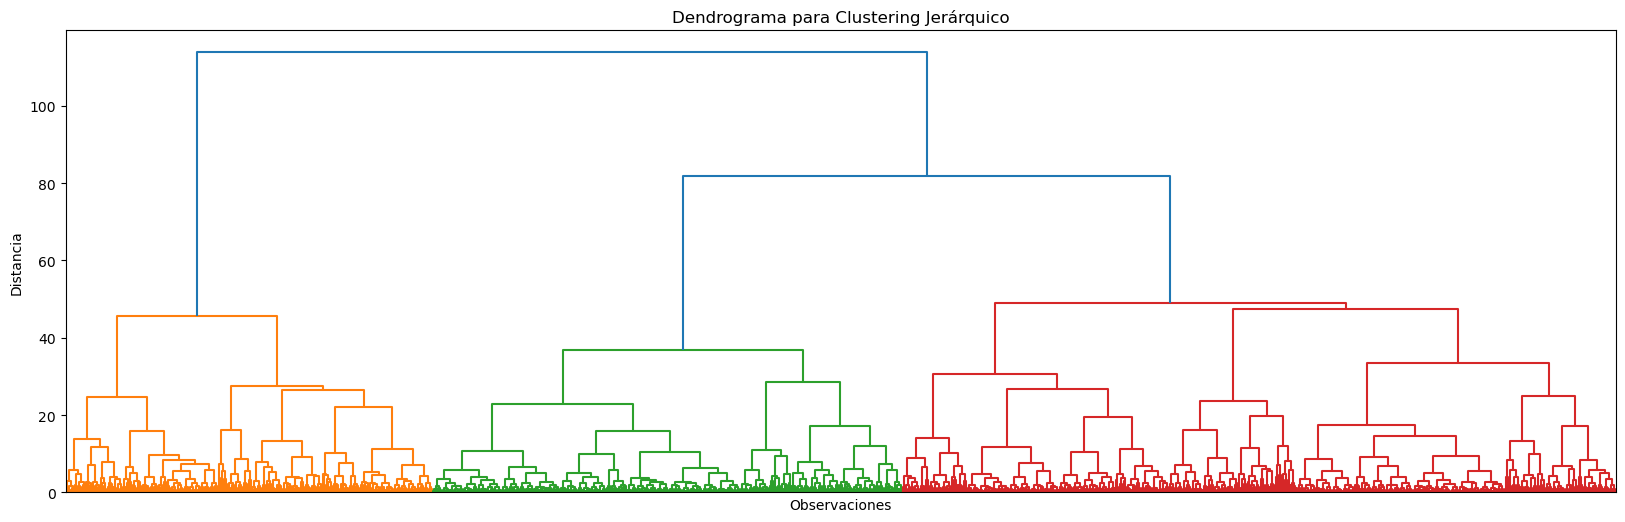

In [19]:
# Crear la matriz de distancias con el método de Ward
X_linked = linkage(X_scaled, method="ward")

# Dendograma
plt.figure(figsize=(20, 6))
dendrogram(X_linked,no_labels=True)
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
plt.show()

Observaciones:
- El dendograma muestra una buena cantidad de grupos sobre la línea de Distancia 20.
- Trazaría la línea para mi análisis a penas arriba de 40, para poder tener 3 clústeres.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Excelente, buen trabajo estructurando el dendrograma, únicamente ten en cuenta que podrías ocultar los ticks del eje x, ya que por la cantidad de datos que están manejando estos, no se logran ver de manera correcta. </div>

<div class="alert alert-block alert-info">
Eliminé las etiquetas de este dendograma y también del de la sección siguiente
</div>

In [20]:
# Definir número de clusters = 3
num_clusters = 3 
# Crear etiquetas de cluster
clean_gym_churn['cluster'] = sch.fcluster(X_linked, num_clusters, criterion='maxclust')

# Revisar distribución de clusters
print(clean_gym_churn['cluster'].value_counts())

cluster
3    1841
2    1211
1     948
Name: count, dtype: int64


Observaciones:
- El cluster 3 agrupa la mayoría de los datos.
- El cluster 1 contiene el 23.7% de todos los registros. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Excelente!!

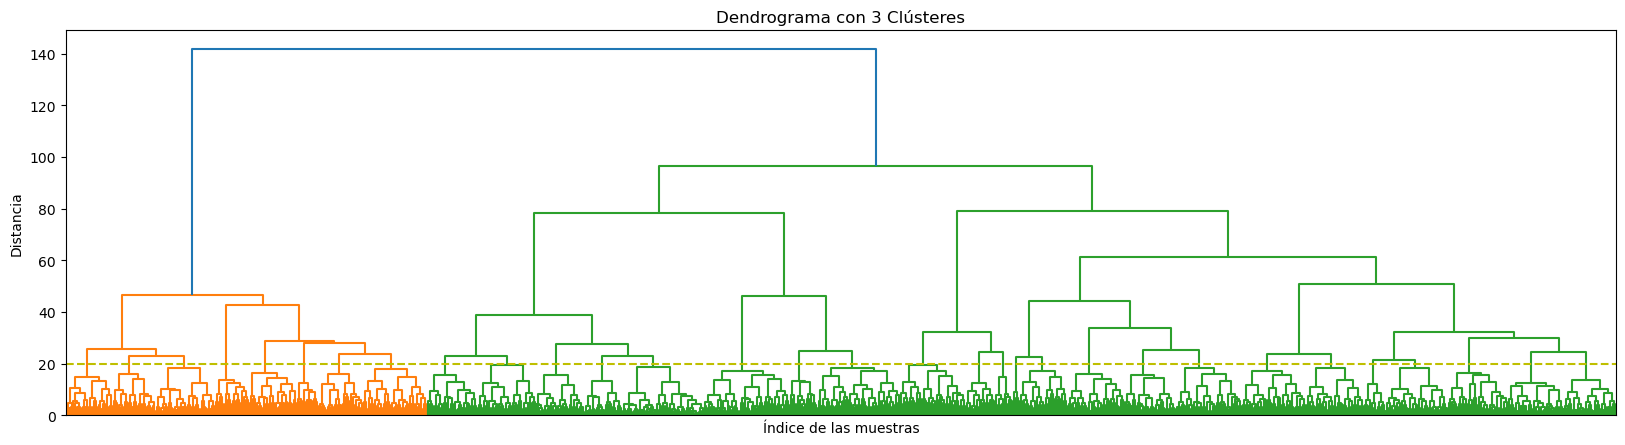

[3 1 3 ... 1 3 1]


In [21]:
# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clean_gym_churn)  # Estandarizar los datos

# Calcular la matriz de distancias
dist_matrix = pdist(X_scaled, metric='euclidean')

# Crear la jerarquía
Z = sch.linkage(dist_matrix, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(20, 5))
sch.dendrogram(Z,no_labels=True)

# Limitar el dendrograma a 3 clústeres
clust = sch.fcluster(Z, t=3, criterion='maxclust')

# Añadir una línea para visualizar dónde se cortan los clústeres
plt.axhline(y=20, color='y', linestyle='--')

plt.title('Dendrograma con 3 Clústeres')
plt.xlabel('Índice de las muestras')
plt.ylabel('Distancia')
plt.show()

# Ahora 'clust' contiene los 3 clústeres
print(clust)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Excelente, buen trabajo desplegando este segundo dendrograma con un número reducido de clusters. Únicamente ten en cuenta el tema de los ticks del eje x.  </div>

## 5.3 Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)

In [22]:
# Estandarizar los datos
sc = StandardScaler()
X_sc = sc.fit_transform(clean_gym_churn)

# Definir el modelo k_means con 5 clústeres y establecer random_state
km = KMeans(n_clusters=5,random_state=40)
# Predicer los clústeres para las observaciones (el algoritmo asigna un número de 0 a 4)
labels = km.fit_predict(X_sc)

# Almacena etiquetas de clúster en el campo de nuestro conjunto de datos
clean_gym_churn['cluster_km'] = labels

# Obtiene las estadísticas de los valores medios de las características por clúster
cluster_mean = clean_gym_churn.groupby(['cluster_km']).mean()

display(cluster_mean)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster
cluster_km,,,,,,,,,,,,,,,
0,0.565499,0.854734,0.391699,0.233463,0.920882,2.793774,0.425422,30.003891,152.322484,2.626459,4.629053,3.055845,3.061636,0.011673,3.000000
1,0.505285,0.932347,0.716702,0.477801,0.902748,12.000000,0.544397,29.816068,164.589097,10.911205,4.650106,2.001276,1.994571,0.022199,1.000000
2,0.510264,0.761486,0.342131,0.173998,0.903226,1.510264,0.261975,26.909091,113.880368,1.461388,0.973607,1.450090,1.017677,0.997067,2.293255
3,0.452229,0.856688,0.000000,0.084395,0.885350,2.265924,0.433121,30.106688,161.100535,2.176752,5.006369,1.384810,1.391243,0.003185,2.638535
4,0.507911,0.827532,0.976266,0.587025,0.901899,3.561709,0.420886,30.004747,153.421263,3.294304,4.416139,1.445748,1.433604,0.014241,2.580696


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Excelente, buen trabajo desplegando el algoritmo Kmeans y estudiando los valores medios de la característica sujeta a los clusters creados.   </div>

## 5.4 Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?

- Todos los clusters agrupan géneros equilibrados.
- El cluster 1 contiene a la mayoría de miembros cercanos al gimnasio, además la media de sus contratos es de 12 meses exactamente y también contiene a los miembros que gastan más dinero en servicios adicionales.
- El cluster 2 concentra la tasa de abandono más alta, su grupo de edad está cerca de los 27 años y es el cluster que gasta menos dinero en servicios adicionales. El ciclo de vida de los miembros de este clúster es de menos de 1 mes.
- El cluster 4 agrupa a la mayoría de miembros que reciben algún beneficio de parte de su empleador, y también la mayoría de miembros que fueron referidos por algún amigo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Buen trabajo.    </div>

## 5.5 Traza distribuciones de características para los clústeres. ¿Notas algo?

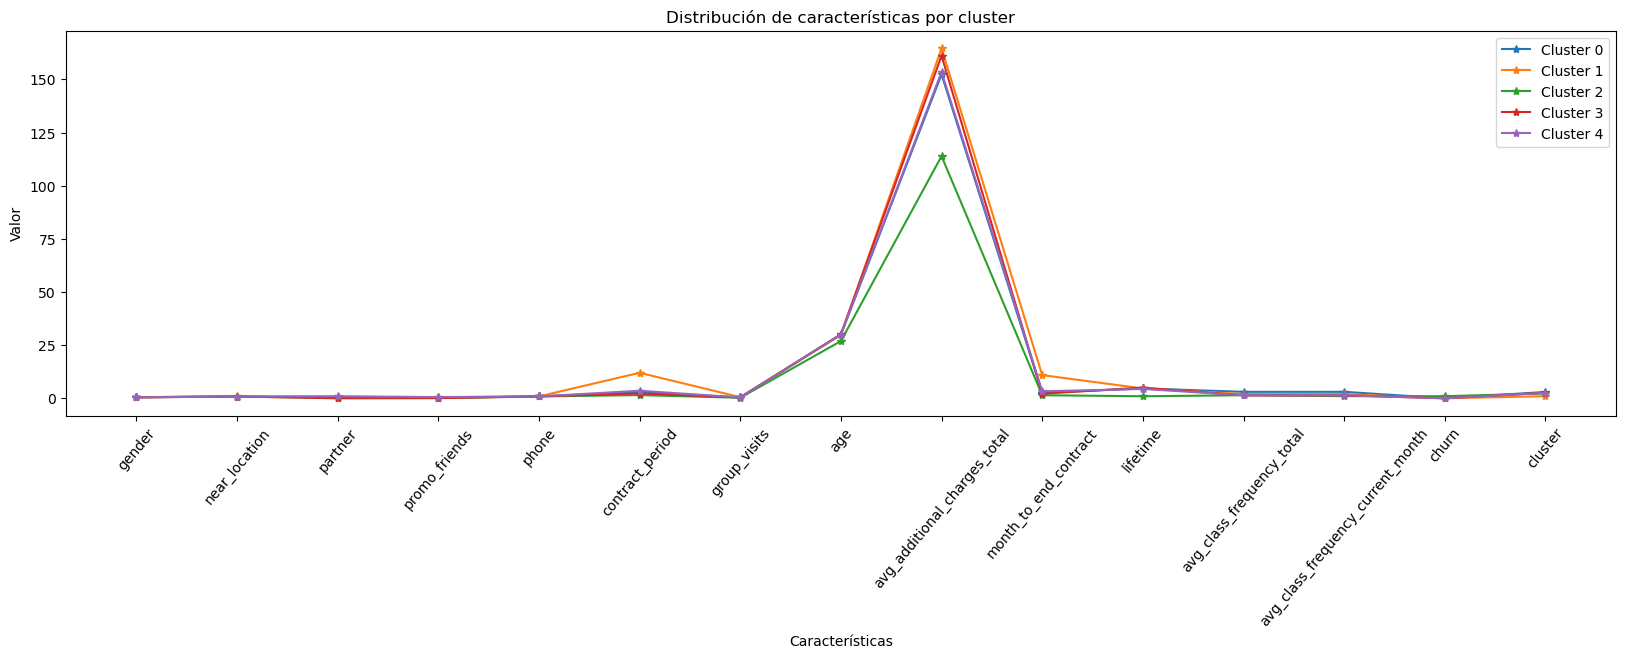

In [23]:
characteristics = cluster_mean.columns

plt.figure(figsize=(20, 5))
for index, row in cluster_mean.iterrows():
    plt.plot(characteristics, row, marker='*', label=f'Cluster {index}')
plt.xticks(rotation=50)
plt.xlabel('Características')
plt.ylabel('Valor')
plt.title('Distribución de características por cluster')
plt.legend()
plt.show()

Observaciones:
- El cluster 2 es el que gasta menos en servicios adicionales. Los demás clústeres muestran gastos similares.
- El cluster 1 es el que muestra los contratos a más largo plazo.

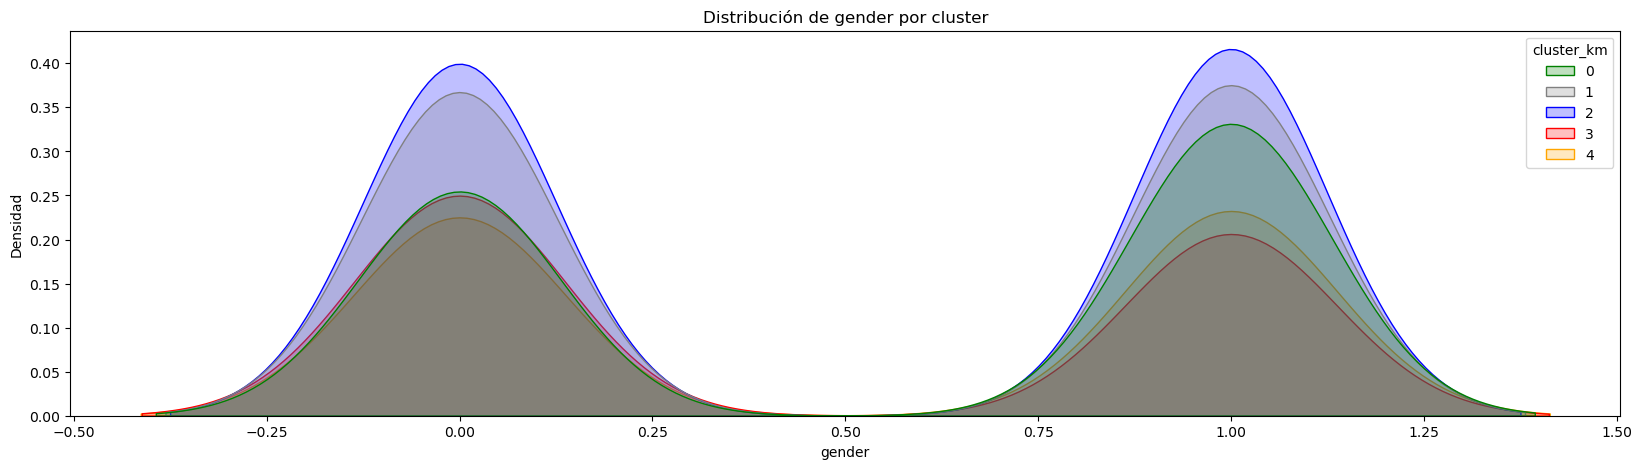

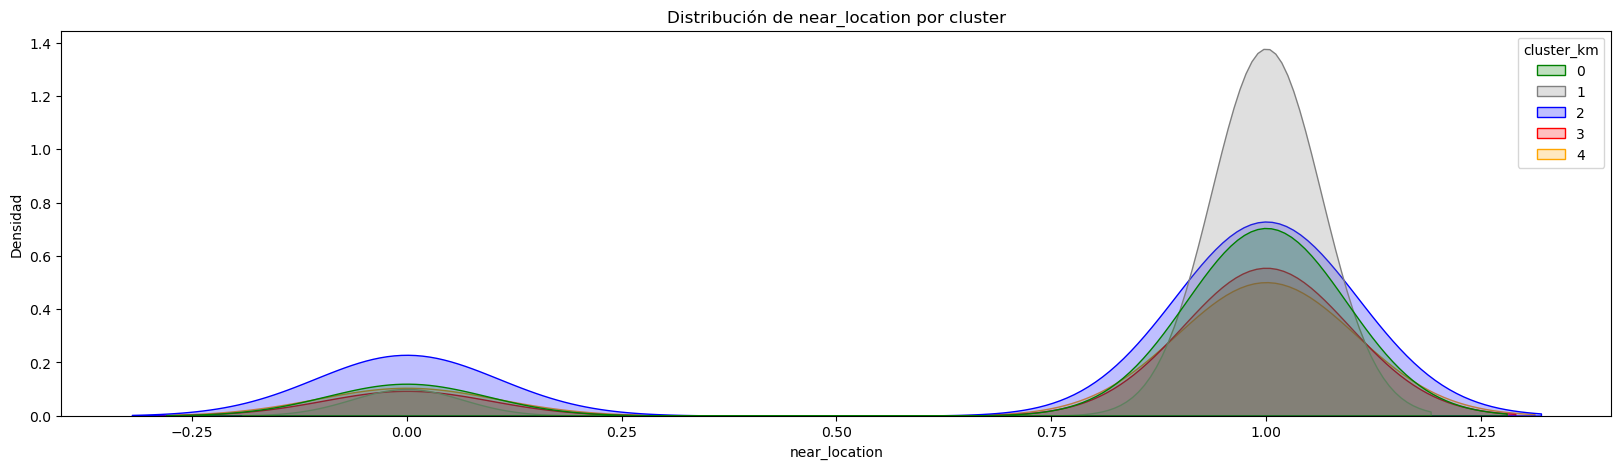

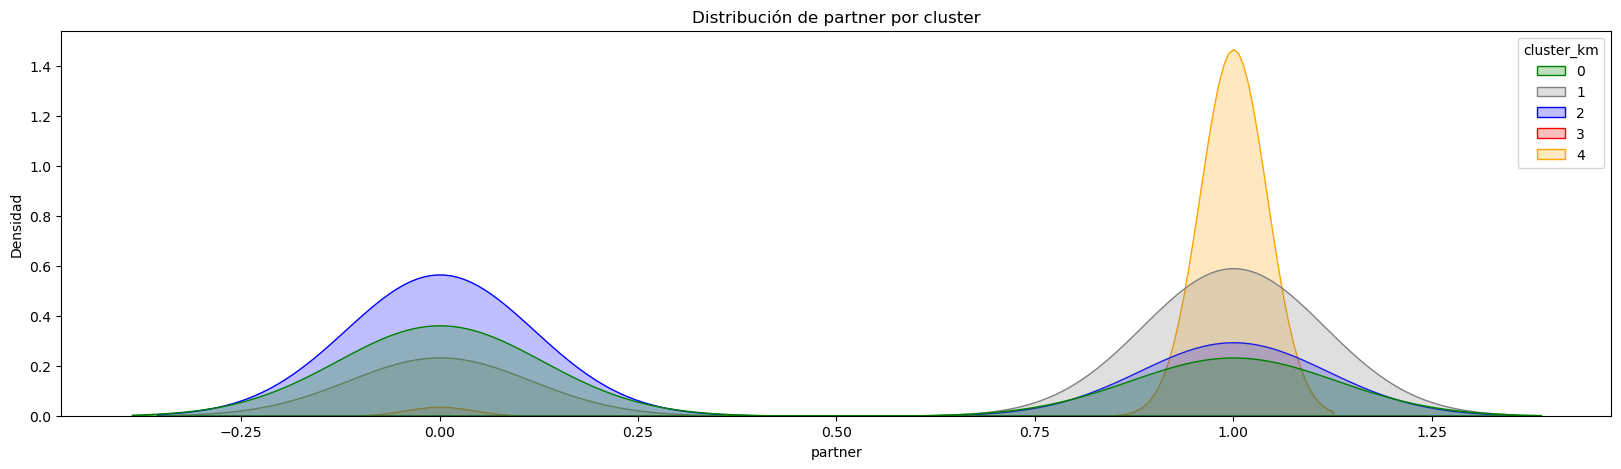

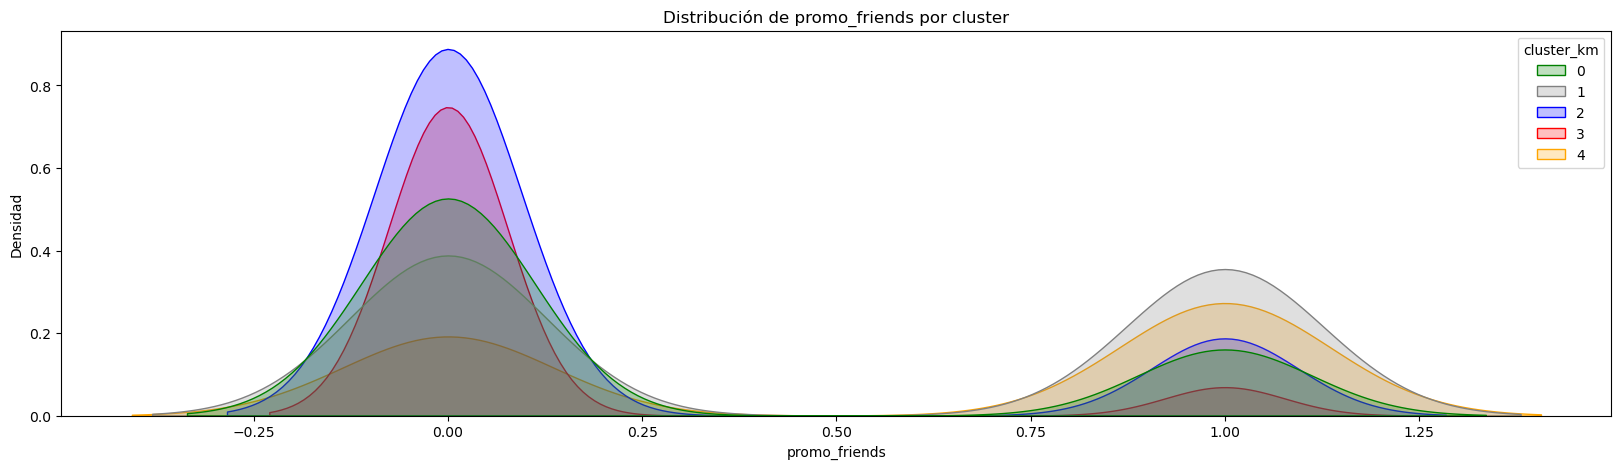

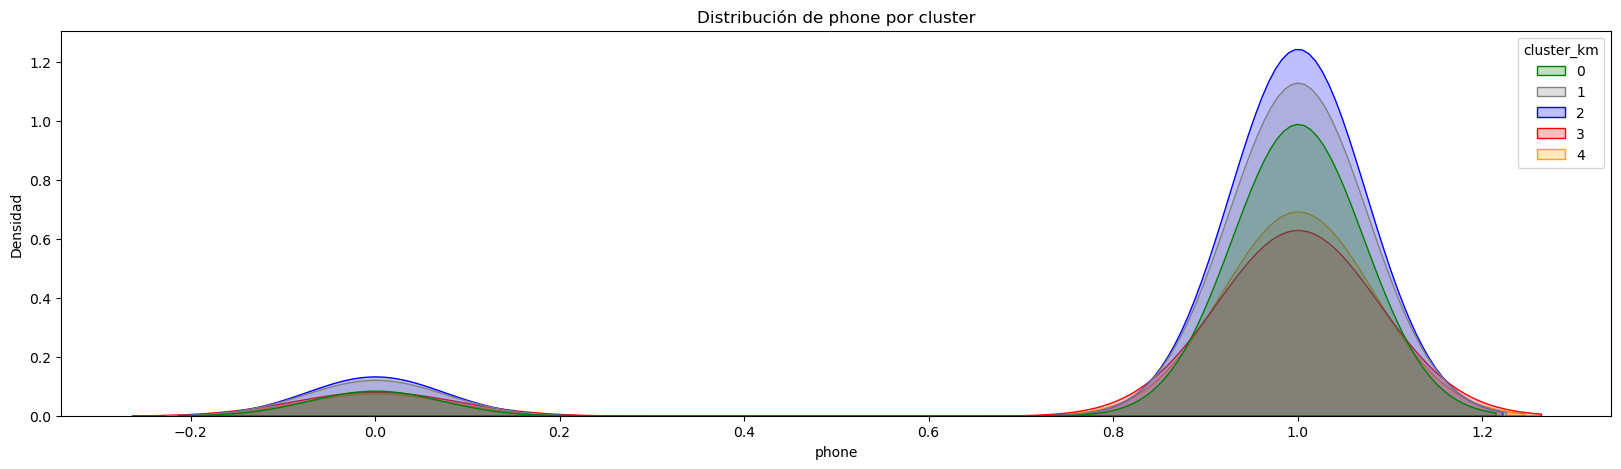

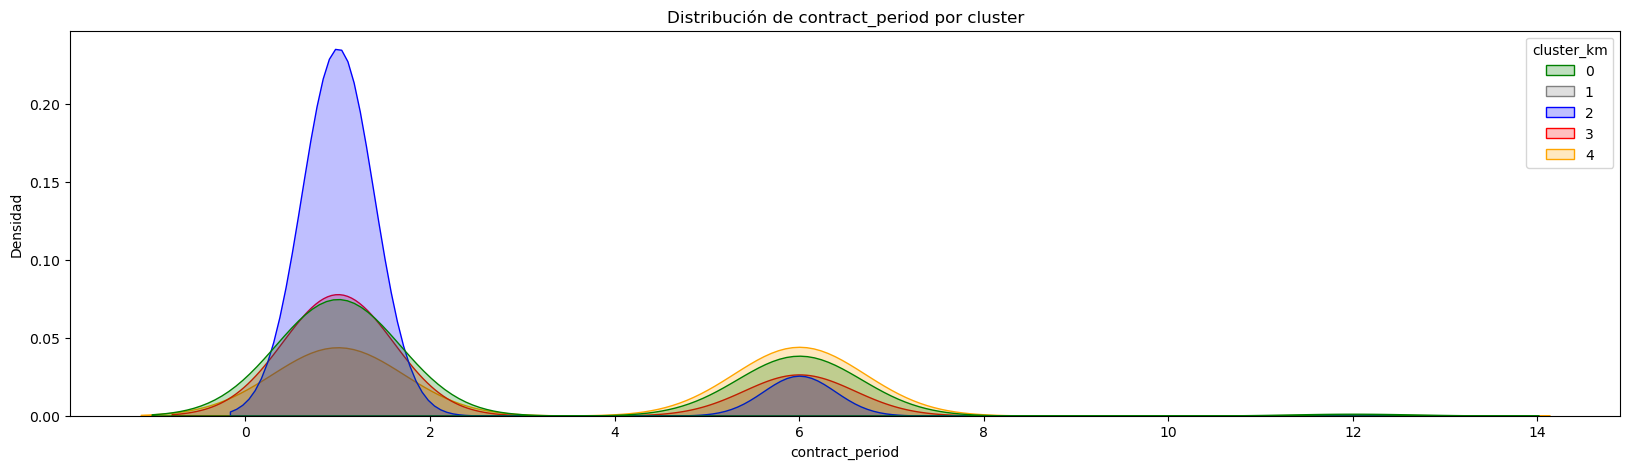

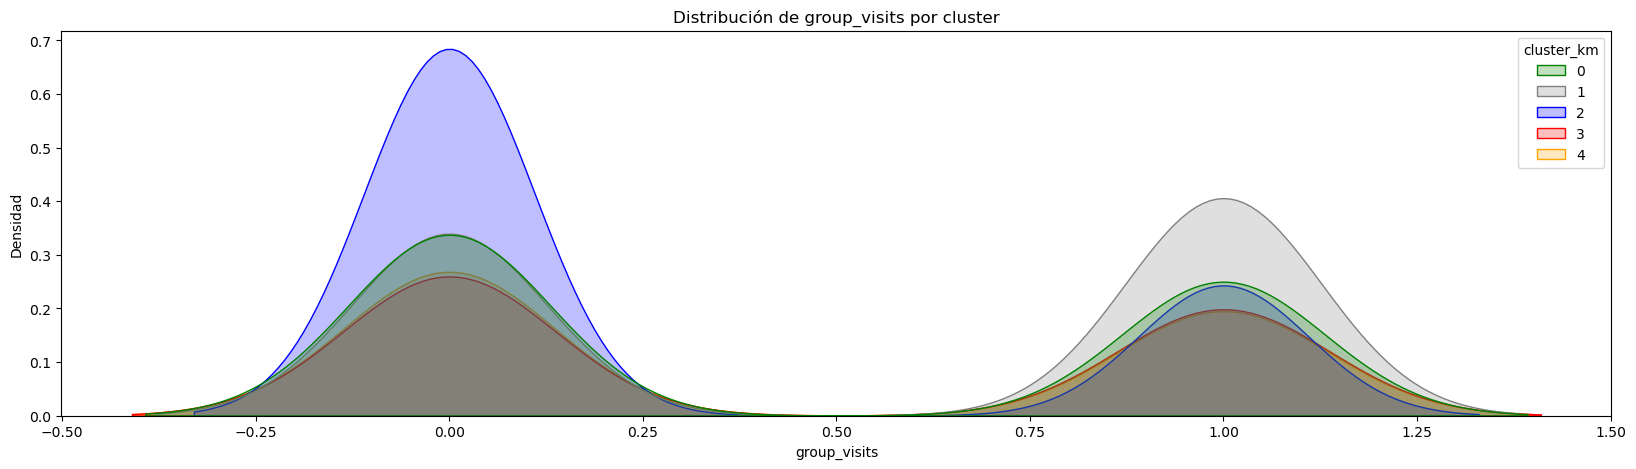

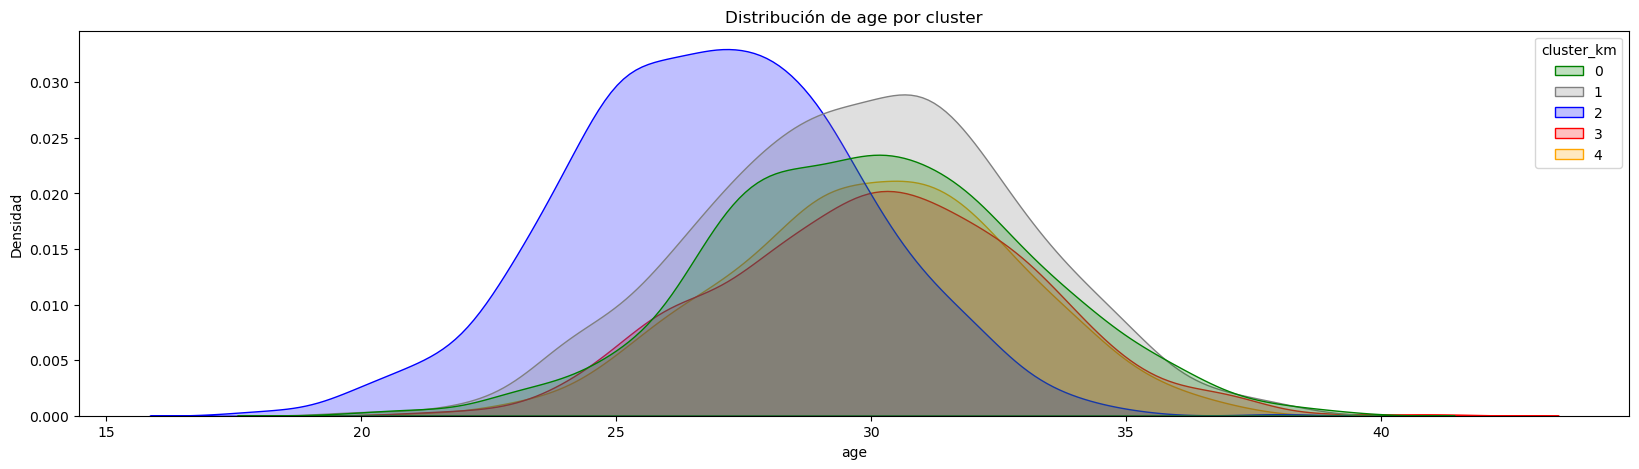

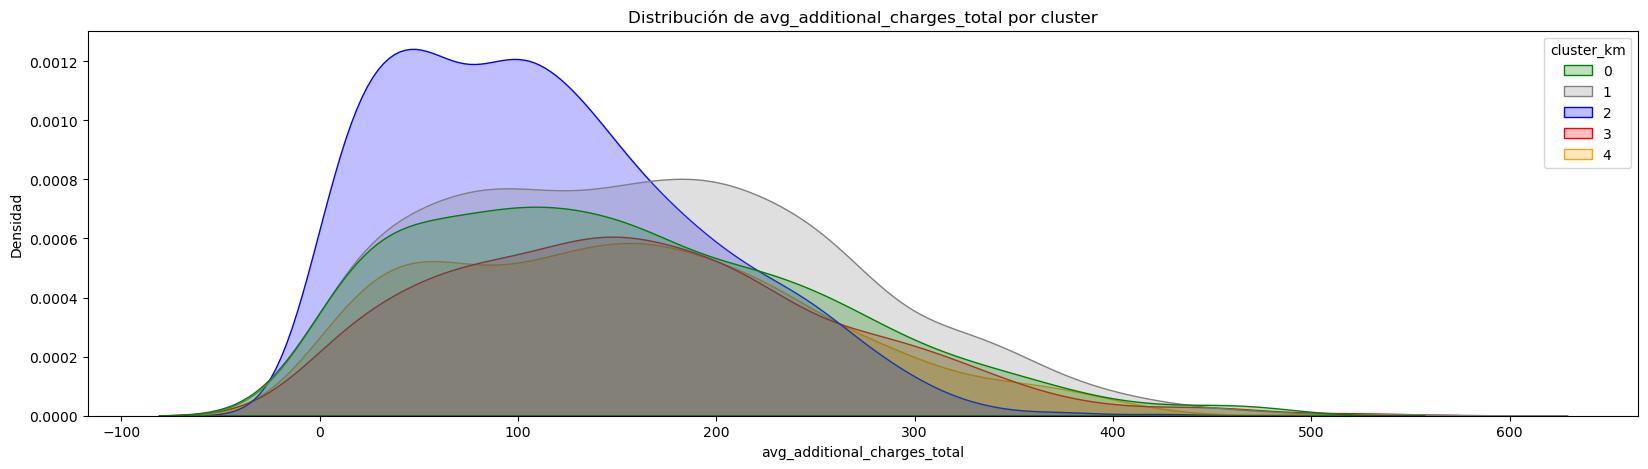

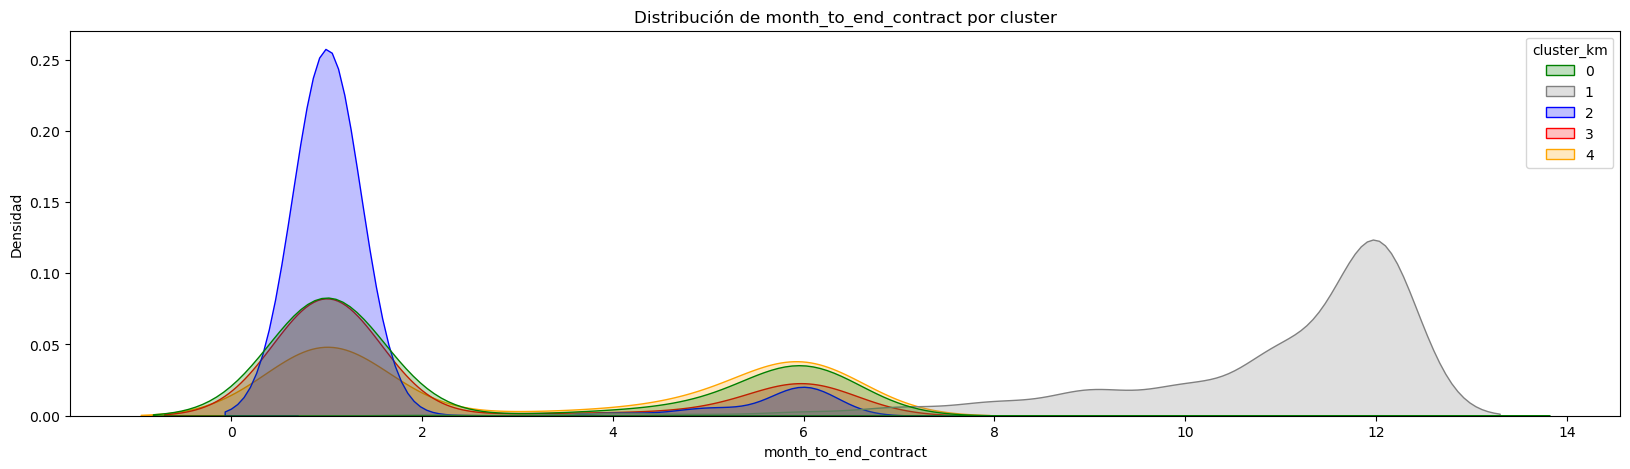

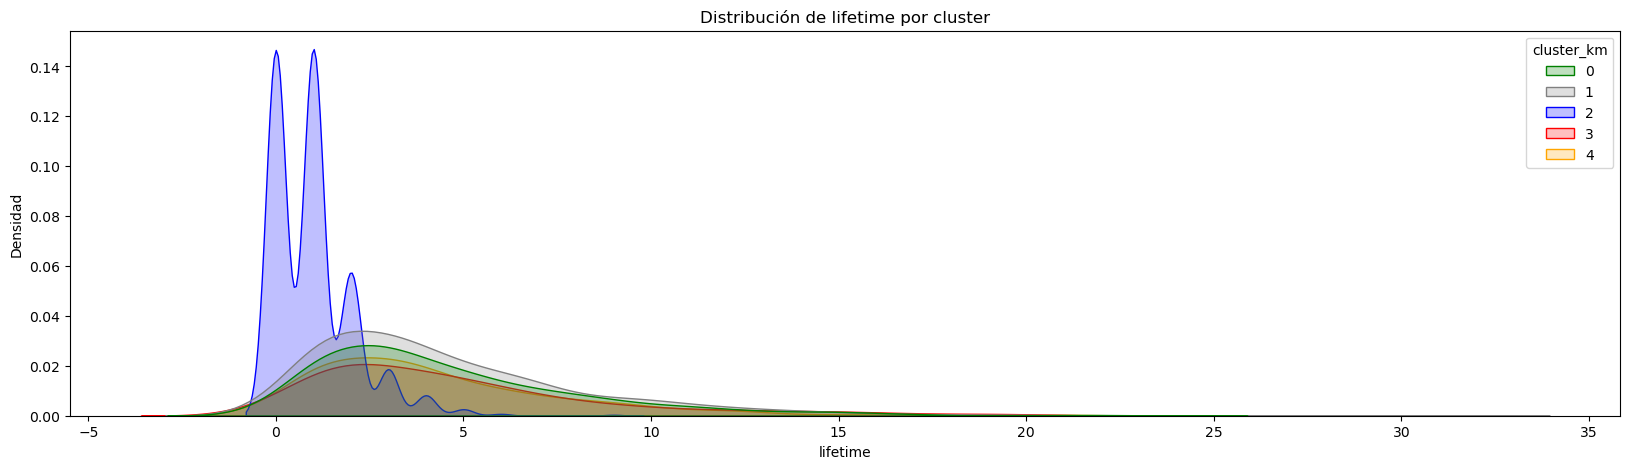

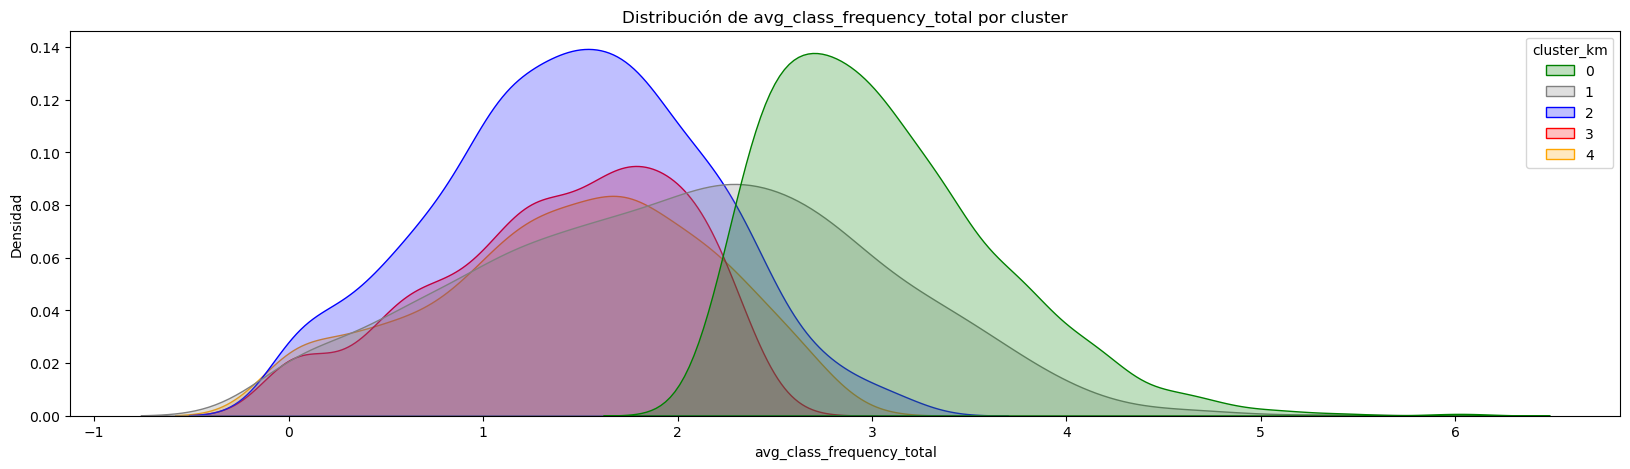

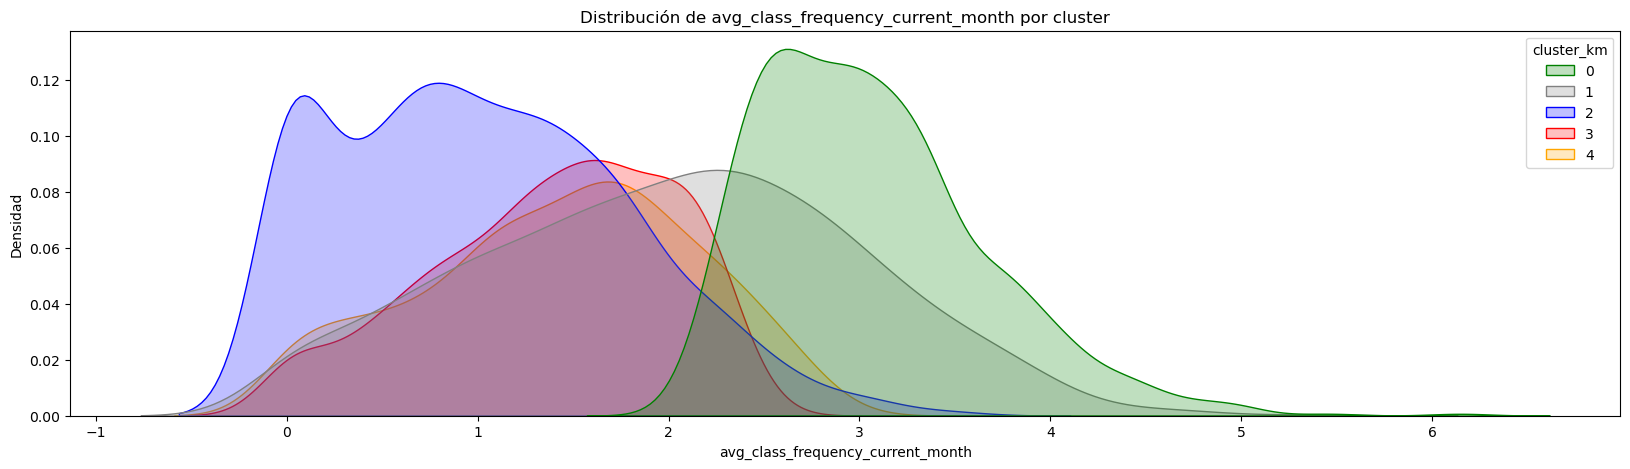

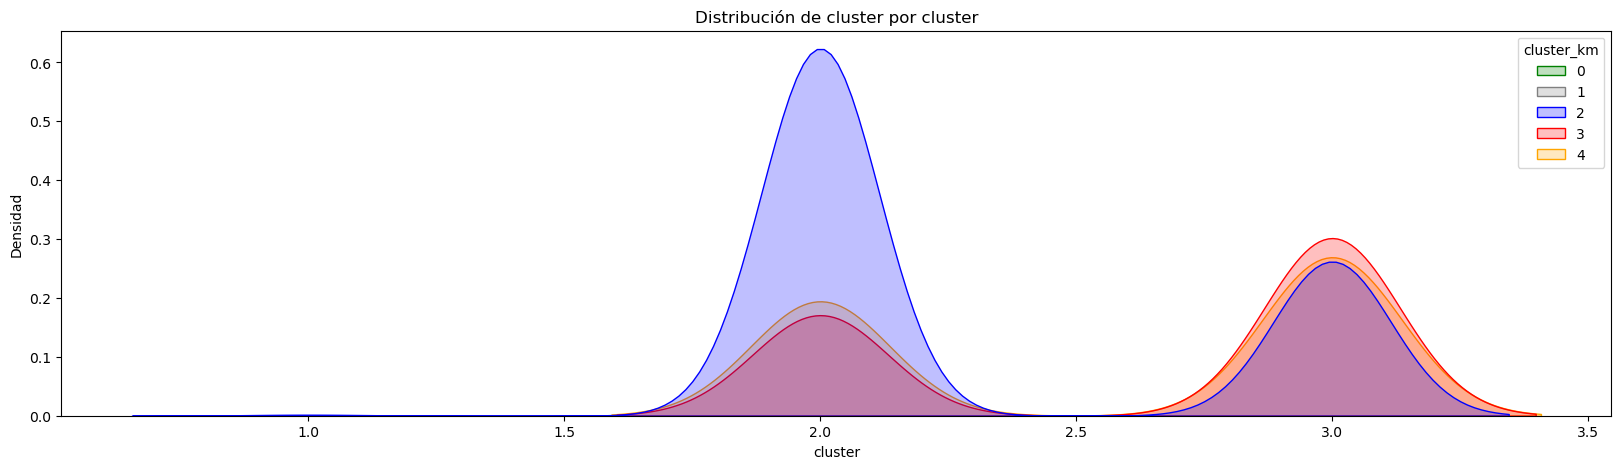

              gender  near_location   partner  promo_friends     phone  \
cluster_km                                                               
0           0.565499       0.854734  0.391699       0.233463  0.920882   
1           0.505285       0.932347  0.716702       0.477801  0.902748   
2           0.510264       0.761486  0.342131       0.173998  0.903226   
3           0.452229       0.856688  0.000000       0.084395  0.885350   
4           0.507911       0.827532  0.976266       0.587025  0.901899   

            contract_period  group_visits        age  \
cluster_km                                             
0                  2.793774      0.425422  30.003891   
1                 12.000000      0.544397  29.816068   
2                  1.510264      0.261975  26.909091   
3                  2.265924      0.433121  30.106688   
4                  3.561709      0.420886  30.004747   

            avg_additional_charges_total  month_to_end_contract  lifetime  \
cluster_km 

In [24]:
#fig, axes = plt.subplots(7,2, figsize=(25,10))
characteristics = cluster_mean.columns
for characteristic in cluster_mean.drop('churn', axis=1).columns:
    plt.figure(figsize=(20, 5))
    sns.kdeplot(data=clean_gym_churn, x=characteristic, hue='cluster_km', fill=True, palette=['green','grey', 'blue','red','orange'],warn_singular=False)
    # sns.kdeplot(data=cluster_mean, x=characteristic, fill=True, palette=['skyblue', 'blue','red','orange','green'],warn_singular=False)
    plt.title(f'Distribución de {characteristic} por cluster')
    plt.xlabel(characteristic)
    plt.ylabel('Densidad')
    plt.show()
print(cluster_mean)

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

En este componente sería genial poder desplegar unos histogramas siguiendo la lógica del punto 3.4   </div>

<div class="alert alert-block alert-info"
    
Añadí las gráficas de distribución por característica para cada cluster
</div>

## 5.6 Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [25]:
# Valores medios de las características para cada clúster
cluster_mean = clean_gym_churn.groupby(['cluster_km']).mean()

# Eliminar columnas irrelevantes
cluster_mean_clean = cluster_mean[['churn','cluster']]
display(cluster_mean_clean)

,churn,cluster
cluster_km,,
0,0.011673,3.000000
1,0.022199,1.000000
2,0.997067,2.293255
3,0.003185,2.638535
4,0.014241,2.580696


Observaciones:
- El clúster 2 sigue siendo propenso a abandonar.
- EL clúster 3 es el que se muestra más leal, con la menor tasa de cancelación 0.3%

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Excelente, buen trabajo estudiando las tasas de cancelación por cluster.    </div>

# 6 Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes

- Los clientes más leales parecen asociarse con contratos más largos, además de rondar los 30 años de edad. Sugiero dar un enfoque de cuidado especial a estos clientes para aumentar aún más su gasto en servicios adicionales durante todo su ciclo de vida.
- Los clientes que más abandonan son los que tienen contratos de 1 mes, además de ser los que menos gastan en servicios adicionales. Sugiero crear una campaña que atraiga clientes para un plazo más largo y así crecer además su gasto adicional.
- Los clientes con contratos más largos también son los que reciben algún beneficio de parte de su empleador o fueron referidos. Sugiero dar más promoción al programa de referidos y también buscar más asociaciones con otras empresas.
- La mayoría de los clientes con contratos largos viven cerca del gimnasio. Sugiero aprovechar ese hecho y hacer promoción más fuerte sobre las ventajas de la cercanía. Tal vez haya incluso que adecuar los horarios para poder admitir a más miembros.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Buen trabajo!    </div>